In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
df=pd.read_csv(r"C:\Users\Waleed\Downloads\weatherHistory.csv")

In [19]:
df=df.drop_duplicates()
df=df.iloc[:,3:11]
df = df[df['Temperature (C)']> - 50]
df = df[df['Temperature (C)']<50]
df = df[df['Humidity']> 0]
df = df[df['Humidity']<1]
df = df[df['Visibility (km)']> 5]
df = df[df['Visibility (km)']<18]
df = df[df["Apparent Temperature (C)"]> - 50]
df = df[df["Apparent Temperature (C)"]<50]
df = df[df["Pressure (millibars)"]>1000]
df = df[df["Wind Bearing (degrees)"] >20]
df = df[df["Cloud Cover"] == 0]

<class 'pandas.core.frame.DataFrame'>
Index: 73319 entries, 0 to 96452
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           73319 non-null  float64
 1   Apparent Temperature (C)  73319 non-null  float64
 2   Humidity                  73319 non-null  float64
 3   Wind Speed (km/h)         73319 non-null  float64
 4   Wind Bearing (degrees)    73319 non-null  float64
 5   Visibility (km)           73319 non-null  float64
 6   Cloud Cover               73319 non-null  float64
 7   Pressure (millibars)      73319 non-null  float64
dtypes: float64(8)
memory usage: 5.0 MB


In [96]:
from sklearn.model_selection import train_test_split
X=df.drop('Temperature (C)', axis=1) 
Y=df['Temperature (C)']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

mean squared error= 0.7883728143866126
RMSE= 0.9905132971740619


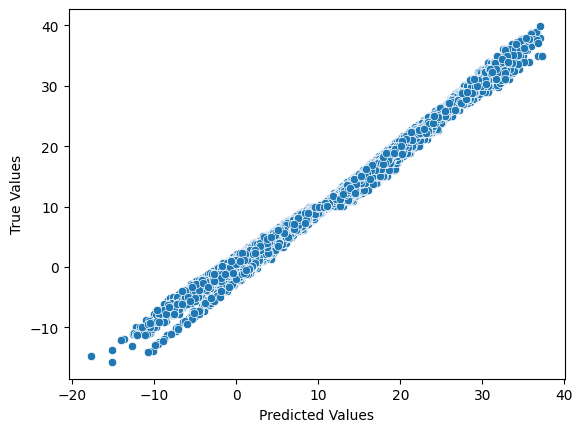

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
LR=LinearRegression()
LR.fit(X_train,Y_train)
Y_predict1=LR.predict(X_test)
sb.scatterplot(x=Y_predict1,y=Y_test,)
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
print('mean squared error=',mean_squared_error(Y_test,Y_predict1))
print('RMSE=',r2_score(Y_test,Y_predict1))

mean squared error= 0.0026106621296464686
RMSE= 0.9999685851980802


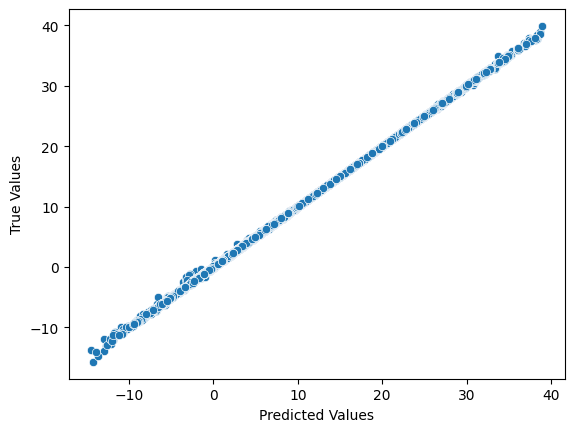

In [108]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)
Y_predict2=RF.predict(X_test)
sb.scatterplot(x=Y_predict2,y=Y_test,)
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
print('mean squared error=',mean_squared_error(Y_test,Y_predict2))
print('RMSE=',r2_score(Y_test,Y_predict2))

mean squared error= 0.0071680878004755045
RMSE= 0.9999137444651155


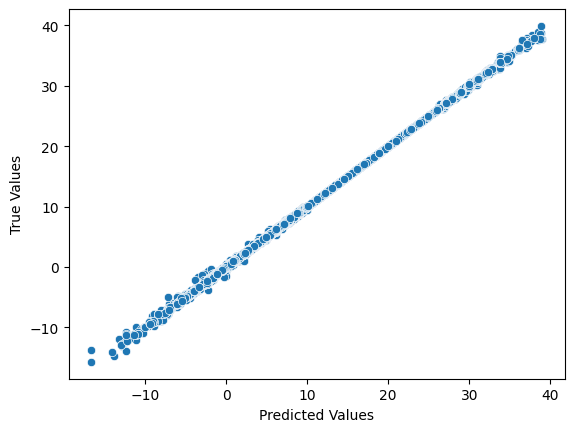

In [106]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)
Y_predict3=DT.predict(X_test)
sb.scatterplot(x=Y_predict3,y=Y_test,)
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
print('mean squared error=',mean_squared_error(Y_test,Y_predict3))
print('RMSE=',r2_score(Y_test,Y_predict3))

1-What type of machine learning problem is this?


This is a regression problem because the task is to predict continuous weather conditions 

2-How do the features relate to each other and to the
weather conditions?


Relationships among features and with the target variable (weather conditions) can be explored through correlation analysis and feature importance metrics from models.

3-What are the steps involved in preprocessing the
dataset for machine learning?

Remove wrong values.
Handle missing values.
Select relevant numerical features.
Split the data into training and testing sets.

4-How do we select the best model for our dataset? 

We train and evaluate multiple models using metrics such as Mean Squared Error (MSE) and R² score. The model with the lowest MSE and highest R² score is typically considered the best.
in this case the best model was the RandomForestRegressor because it had the hight (MSE) and lowest R²

5-What metrics should we use to evaluate the
performance of our weather prediction model?

Mean Squared Error (MSE):

Mean Squared Error (MSE) is a metric used to evaluate the accuracy of a regression model. It measures the average of the squares of the differences between the predicted values and the actual values.

R² Score:

The R² Score (or Coefficient of Determination) is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
